# Laboration 2, Simulering av stokastisk variabel
Denna laboration består av tre obligatorisk uppgifter samt frivilliga extrauppgifter. Uppgifterna går ut på att genomföra simulering i Python med inversa metoden för två olika kontinuerliga fördelningar (Uppgift 1 och 2) samt en diskret fördelning (Uppgift 3). Huvudsyftet med laborationen är att öka förståelsen för vad en stokastisk variabel är.
## Obligatorisk förberedelse innan laborationen startar
Titta på videoföreläsningen om simulering. Beräkna sedan för hand fördelningsfunktion och fördelningsfunktionens invers för Uppgift 1 och Uppgift 2. Dessa räkningar redovisas för närvarande lärare i samband med inledningen av laborationstillfället.
## Genomförande
Laborationen genomförs på plats i sal i par eller enskilt. Om man arbetar i par växlar man mellan att vara navigatör och kodare i skift om 10-15 minuter.
## Examination
Laborationen examineras på plats genom att visa upp lösningar och svara på frågor kring lösningarna.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.integrate as integrate
import scipy.optimize as optimize

# Uppgift 1 (En första simulering)
Skriv en metod som för varje $x$ i $[0,1]$ returnerar $f_X(x)$ där $f_X$ är täthetsfunktionen 

$f_X(x) = \begin{cases}\frac{3}{2} (1 - x) + \frac{1}{4},\quad x \in [0,1]\\0,\quad \text{otherwise.}\end{cases}$

Skriv även en metod som hanterar fördelningsfunktionen $F_X(x)$ samt dess invers $F_X^{-1}$.

In [23]:
def f(x):
    if 0 <= x <= 1:
        return (3/2)*(1-x) + (1/4)
    else:
        return 0 
def F(x):
    if x < 0:
        return 0
    elif x > 1:
        return 1
    else:
        return integrate.quad(f, 0, x)[0]
def invF(q):
    if q <= 0:
        return 0
    elif q >= 1:
        return 1
    else:
        return optimize.root_scalar(lambda x: F(x) - q, bracket=[0, 1]).root

Skapa en figur där du plottar de tre funktionerna $f_X(x)$, $F_X(x)$ och $F_X^{-1}(y)$ i något lämpligt interval för var och en av funktionerna. Gör alla tre i olika färger och ta med lämpliga labels och en legend.

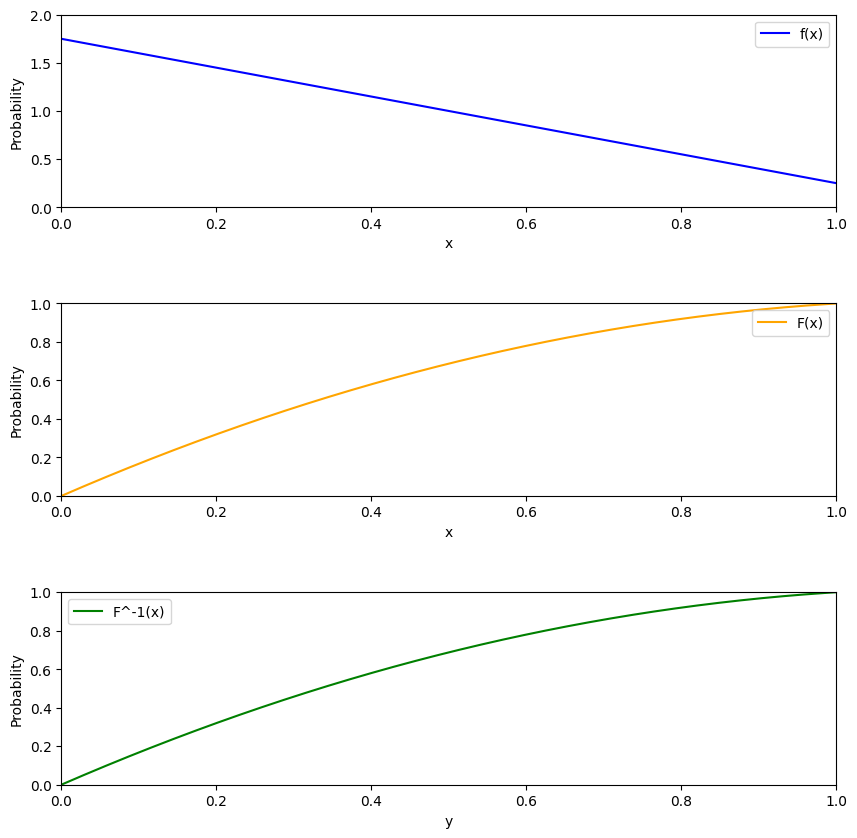

In [20]:
# create figure with 3 subplots
fig, axs = plt.subplots(3, 1, figsize=(10,10))

# plot probability density function f(x)
x = np.linspace(0, 1, 1000)
y = [f(i) for i in x]
axs[0].plot(x, y, label='f(x)', color='blue')

# set appropriate interval for f(x)
axs[0].set_xlim([0, 1])
axs[0].set_ylim([0, 2])

# add legend and axis labels for f(x)
axs[0].legend(loc='upper right')
axs[0].set_xlabel('x')
axs[0].set_ylabel('Probability')

# plot cumulative distribution function F(x)
x = np.linspace(0, 1, 1000)
y = [F(i) for i in x]
axs[1].plot(x, y, label='F(x)', color='orange')

# set appropriate interval for F(x)
axs[1].set_xlim([0, 1])
axs[1].set_ylim([0, 1])

# add legend and axis labels for F(x)
axs[1].legend(loc='upper right')
axs[1].set_xlabel('x')
axs[1].set_ylabel('Probability')

# plot inverse cumulative distribution function F^-1(x)
y = np.linspace(0, 1, 1000)
x = [invF(i) for i in y]
axs[2].plot(x, y, label='F^-1(x)', color='green')

# set appropriate interval for F^-1(x)
axs[2].set_xlim([0, 1])
axs[2].set_ylim([0, 1])

# add legend and axis labels for F^-1(x)
axs[2].legend(loc='upper left')
axs[2].set_xlabel('y')
axs[2].set_ylabel('Probability')

# adjust subplot spacing
plt.subplots_adjust(hspace=0.5)

plt.show()

Nu ska vi simulera stickprov från fördelningen $f_X(x)$ med hjälp av inversa metoden. För att kunna använda denna metod måste vi kunna generera stickprov från en likformig(0,1) fördelning. I ``numpy`` görs detta enkelt med ``np.random.rand(n)``, där $n$ anger storleken på stickprovet.

För att testa detta kommando, gör vi ett histogram av 100 samples från en likformig(0,1) fördelning. 


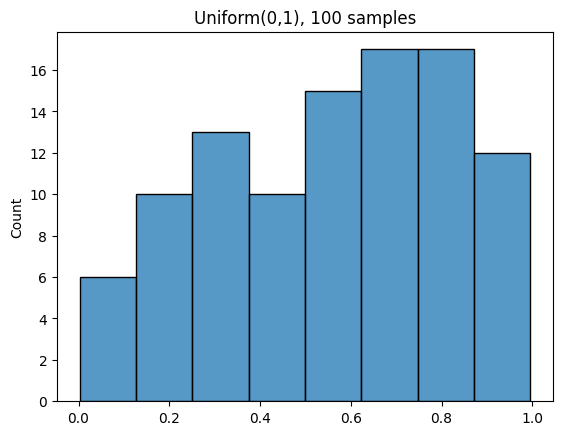

In [9]:
data = np.random.rand(100)
sns.histplot(data)
plt.title('Uniform(0,1), 100 samples')
plt.show()

Nu kommer vi till den slutgiltiga simlueringen för vår första fördelning. Skapa tre olika plottar som vi delar på med hjälp av subplots. 
1. Gör tre olika histogram med slumpmässiga samples från en stokastisk varibel med täthetsfunktion $f_X$. I det första diagrammet ska vi ha 10 samples, i det andra 100, och i det tredje 10000. Sätt en lämplig titel på varje subplot. Använda invers-metod genom att använda att  $X= F_X^{-1}(Y)$ där $Y\sim U(0,1)$.
2. I varje plot ska du även inkludera $f_X(x)$ som en röd streckad plot.
3. Notera att du måste normalisera dina histogram med ``stat = denisty``

OBS! kommandot ``plt.figure(figsize=(15,5))`` eller annan valfri storlek kan komma väl till pass.

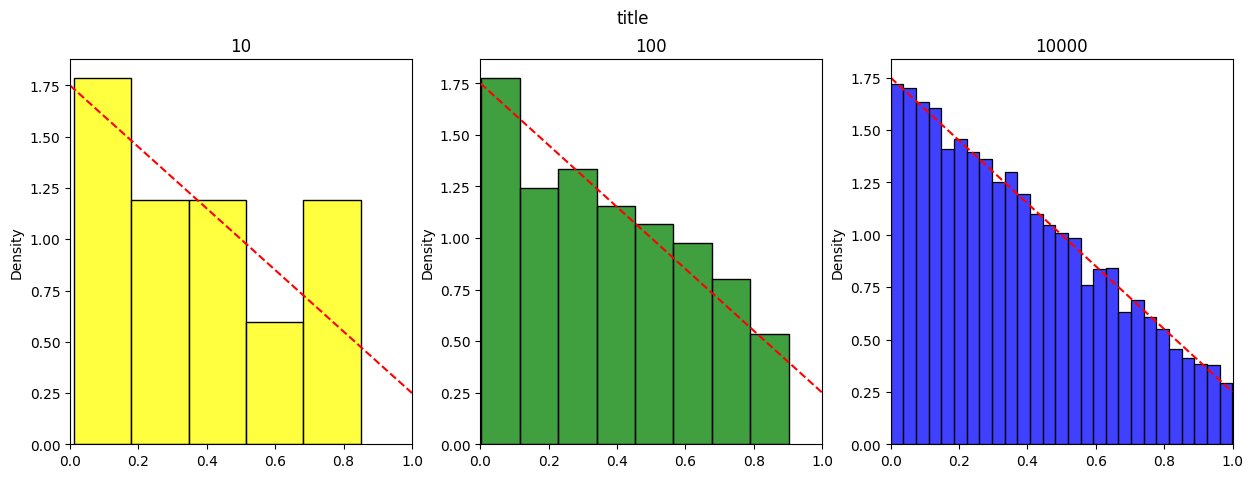

In [53]:
plt.figure(figsize=(15,5))
plt.suptitle('title')

x = np.linspace(0, 1, 1000)
y = (3/2)*(1-x) + (1/4)
data1 = np.random.rand(10)
data2 = np.random.rand(100)
data3 = np.random.rand(10000)


plt.subplot(131)
plt.title('10')
plt.xlim(0, 1)
sns.histplot(data=[invF(i)for i in data1], color='yellow', stat='density')
plt.plot(x, y, 'r--')

plt.subplot(132)
plt.title('100')
plt.xlim(0, 1)
sns.histplot(data=[invF(i)for i in data2], color='green', stat='density')
plt.plot(x, y, 'r--')

plt.subplot(133)
plt.title('10000')
plt.xlim(0, 1)
sns.histplot(data=[invF(i)for i in data3], color='blue', stat='density')
plt.plot(x, y, 'r--')

plt.show()

# Uppgift 2 (Weibullfördelning)
Vi ska nu göra ungefär samma sak som i uppgift 1 fast med en Weibull-fördelning. Täthetsfunktionen för en Weibull-fördelning ser ut som följer
$$g_X(x) = \begin{cases} \frac{k}{\lambda}\left(\frac{x}{\lambda}\right)^{k-1}\exp(-(x/\lambda)^k), \quad x\geq0\\0,\quad x < 0.\end{cases}$$ 
I denna uppgift ska vi specfikt arbeta med parametrarna $k=2$, och $\lambda=3$. Vi börjar med att skapa upp metoder för funktionerna $g_X(x)$ (dess PDF), $G_X(x)$ (dess CDF) och slutligen inversen till dess CDF, $F_X^{-1}(y)$. 

In [34]:
def g(x):
    k = 2
    lam = 3
    if x < 0:
        return 0
    else:
        return (k / lam) * ((x / lam) ** (k - 1)) * np.exp(-1 * ((x / lam) ** k)) 
def G(x):
    k = 2
    lam = 3
    if x < 0:
        return 0
    else:
        return 1 - np.exp(-1 * ((x / lam) ** k))
def invG(p):
    k = 2
    lam = 3
    if p < 0 or p > 1:
        return None
    else:
        return lam * ((-1 * np.log(1 - p)) ** (1 / k))

Nu ska vi upprepa det vi gjorde i föregående uppgift. Skapa tre olika plottar som vi delar på med hjälp av subplots. 
1. Gör tre olika histogram med slumpmässiga samples från en stokastisk varibel med täthetsfunktion $g_X$. I det första diagrammet ska vi ha 10 samples, i det andra 100, och i det tredje 10000. Sätt en lämplig titel på varje subplot.
2. I varje plot ska du även inkludera täthetsfunktionen $g_X(x)$ som en röd streckad plot.
3. Notera att du måste normalisera dina histogram så att de har arean 1.

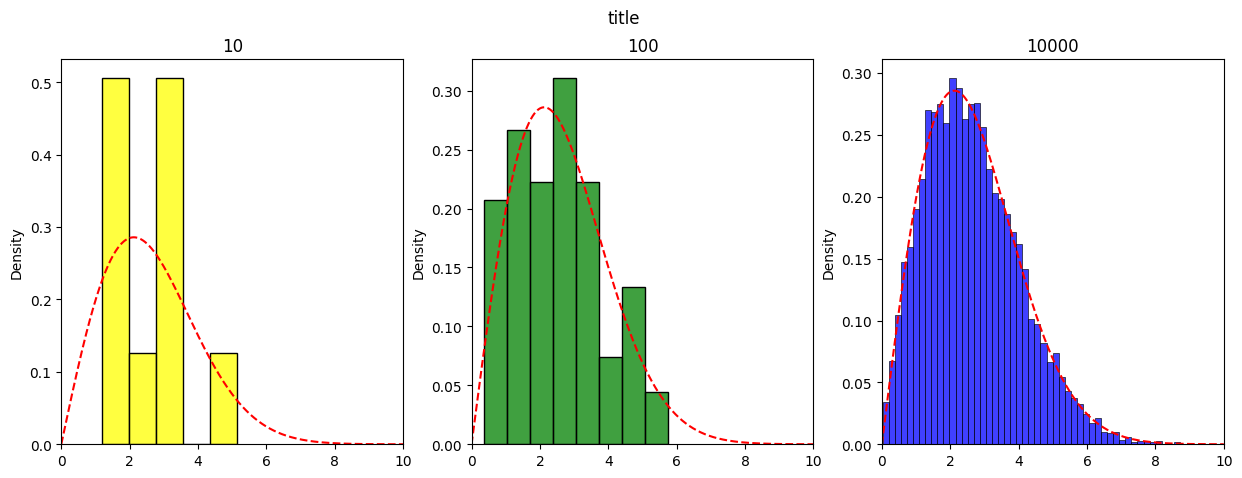

In [82]:
plt.figure(figsize=(15,5))
plt.suptitle('title')

k = 2
lam = 3
x = np.linspace(0, 10, 1000)
y = (k / lam) * ((x / lam) ** (k - 1)) * np.exp(-1 * ((x / lam) ** k))
data1 = np.random.rand(10)
data2 = np.random.rand(100)
data3 = np.random.rand(10000)


plt.subplot(131)
plt.title('10')
plt.xlim(0, 10)
sns.histplot(data=[invG(i)for i in data1], color='yellow', stat='density')
plt.plot(x, y, 'r--')

plt.subplot(132)
plt.title('100')
plt.xlim(0, 10)
sns.histplot(data=[invG(i)for i in data2], color='green', stat='density')
plt.plot(x, y, 'r--')

plt.subplot(133)
plt.title('10000')
plt.xlim(0, 10)
sns.histplot(data=[invG(i)for i in data3], color='blue', stat='density')
plt.plot(x, y, 'r--')

plt.show()

# Extrauppgift (om tid finns)
Nu när vi ändå kontrollerar denna process med att generera samples av en stokastisk varibel, så kan vi även titta på bregreppet _kvartiler_. Inom statistik är kvartilerna de tre punkter som delar upp ett sorterat datamaterial i fyra lika delar. Inom sannolikhetsläran är det de tre punkter som delar en fördelning i fyra lika delar. Alltså den första kvartilen är det tal $\alpha$ sådant att $\int_{-\infty}^\alpha g_X(x)dx = G_X(\alpha) = 0.25$. Nästa kvartil (även kallad median) ersätter 0.25 med 0.5 och den sista ersätter detta tal med 0.75. (Senare i kursen kommer vi att prata mer om dessa begrepp).

Från ekvationen ovan ser vi att vi t.ex. söker $G_X(\alpha) = 0.5$, vilket ger $\alpha = G_X^{-1}(0.5)$. Vi ska nu utnyttja att vi har denna information(alltså $G_X^{-1}$) för att färglägga vår sista plot med två olika färger som var och en representerar lika stor del av täthetsfunktionens totala area.

1. Genererar först 10000 slumptal Uniform(0,1). Spara dessa i en vektor ``data``.
2. Skapa sedan en ny vektor ``medianq = data > 0.5``
3. Nu behöver vi använda ``pandas`` så se till att detta är importerat och skapa sedan en dataframe som heter ``df`` innehållande både data och medianq (kontrollera att dataframen ser ut som du vill när den är skapad (den ska ha två kolumner och 10000 rader) möjligen måste data transponseras med ``np.transpose`` t.ex.).
4. Rita upp en histplot ``sns.histplot(data=df, x = 'data', hue = 'medianq')``. Det sista argumentet säger att histogrammet ska ha olika färger beroende på vilket värde den har på ``medianq``. Notera också att vi här antagit att kolumnerna heter ``data`` och ``medianq``.


In [ ]:
# extrauppgift för den som är intresserad, men måste inte göras!

# Uppgift 3 (Diskret fördelning)
När man arbetar med diskreta fördelningar så kan vi precis som med kontinuerliga använda invers-metoden för att generera slumpmässiga samples. I denna uppgift kommer vi arbeta med följande diskreta fördelning som har följande sannolikhetsfunktion
$h_X(x) = \begin{cases} 
0.05,\quad x = 0\\
0.45,\quad x = 1\\
0.5,\quad x = 2
\end{cases}$

Uppgiften är att göra samma sak som i uppgift 1 och 2. Ta fram fördelningsfunktionen samt dess invers. Notera att fördelningsfunktionen av en sannolikhetsfunktion är en trappfunktion, och inversen av en trappfunktion är igen en trappfunktion (fast såklart inte nödvändigtvis densamma).

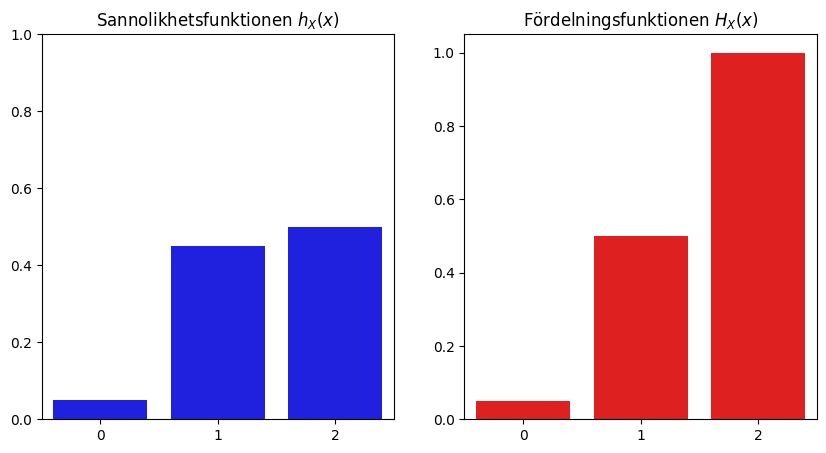

In [39]:
plt.figure(figsize=(10, 5))
x = np.array([0, 1, 2]) # de möjliga utfallen för X
y = np.array([0.05, 0.45, 0.5]) # motsvarande sannolikheter

# En plot av sannolikhetsfunktionen h_X(x) med ett stapeldiagram
plt.subplot(121)
sns.barplot(x = x, y = y, color = 'blue')
plt.title('Sannolikhetsfunktionen $h_X(x)$')
plt.ylim([0, 1]) # för att skalan ska vara samma på båda plottarna

# En plot av fördelningsfunktionen H_X(x)
plt.subplot(122)
sns.barplot(x = x, y = np.cumsum(y), color = 'red') # cumsum är kumulativ summa av en vektor
plt.title('Fördelningsfunktionen $H_X(x)$')
plt.show()


Vi börjar igen med att skapa metoder för funktionerna $h_X(x)$, $H_X(x)$ och dess invers. Det enklaste sättet att skapa dessa på är med helt vanliga villkorssatser:

``
if x < 0:
    return 0
elif x < 1
    return 0.05
...
``

Notera dock att för att göra koden smidig så bör det gå att skicka in en vektor $x$ och inte bara en skalär. Detta kan antigen lösas genom att man itererar över vektorn och löser det på så sätt elementvis eller genom att man utför olika logiska funktioner, t.ex.

``
x = np.array([0.9, 1, 0.5, 0.75])
z = 0.2*((x < 0.95) & (x > 0.8))
``
Output blir då ``array([0.2, 0. , 0. , 0. ])`` alltså alla tal i intervallet $(0.8, 0.95)$ tilldelas $0.2$, resten 0.

In [69]:
def h(x):
    if x == 0:
        return 0.05
    elif x == 1:
        return 0.45
    elif x == 2:
        return 0.5
    else:
        return 0

def H(x):
    if  x < 0:
        return 0
    elif x < 1:
        return 0.05
    elif x < 2:
        return 0.5
    else:
        return 1

def invH(x):
    if x < 0 or x > 1:
        return None
    elif x < 0.05:
        return -float('inf')
    elif x < 0.5:
        return 0
    elif x < 1:
        return 1
    else:
        return float('inf')

Nu ska vi rita upp utfallen av våra samples av stokastiska variabler som stapeldiagram tillsammans med den sanna distributionen. Vi ska likt tidigare skapa tre olika plottar som vi delar på med hjälp av subplots. 

Ni ska göra tre olika barplots med slumpmässiga samples från en stokastisk varibel med sannolikhetsfunktion $h_X$. I det första diagrammet ska vi ha 10 samples, i det andra 100, och i det tredje 10000. Sätt en lämplig titel på varje subplot. För att rita upp en barplot behöver vi $x$-värdena (utfallsrummet d.v.s $[0,1,2]$) samt motsvarande $y$-värden. I ett stapeldiagram ska $y$-värdena motsvaras av relativa frekvensen av utfallen. Utmaningen ligger alltså i att ta en vektor $x$ innehållande ett antal 0:or, 1:or och 2:or, och att sedan räkna frekvenserna av dessa. 

För att räkna frekvenser kan det vara till hjälp (men inte nödvändigt) att kolla upp kommandot ``np.unique``. Ett annat sätt är t.ex. ``np.sum(x == 1)``. Här är ``x == 1`` en logisk vektor innehållande 0:or är $x$ ej är 1 och 1 i övrigt. Använder vi ``np.sum`` på denna vektor summeras frekvenserna.

I varje plot ska du även inkludera sannolikhetsfunktionen $h_X(x)$ som en jämförelse mot de simulerade värdena.

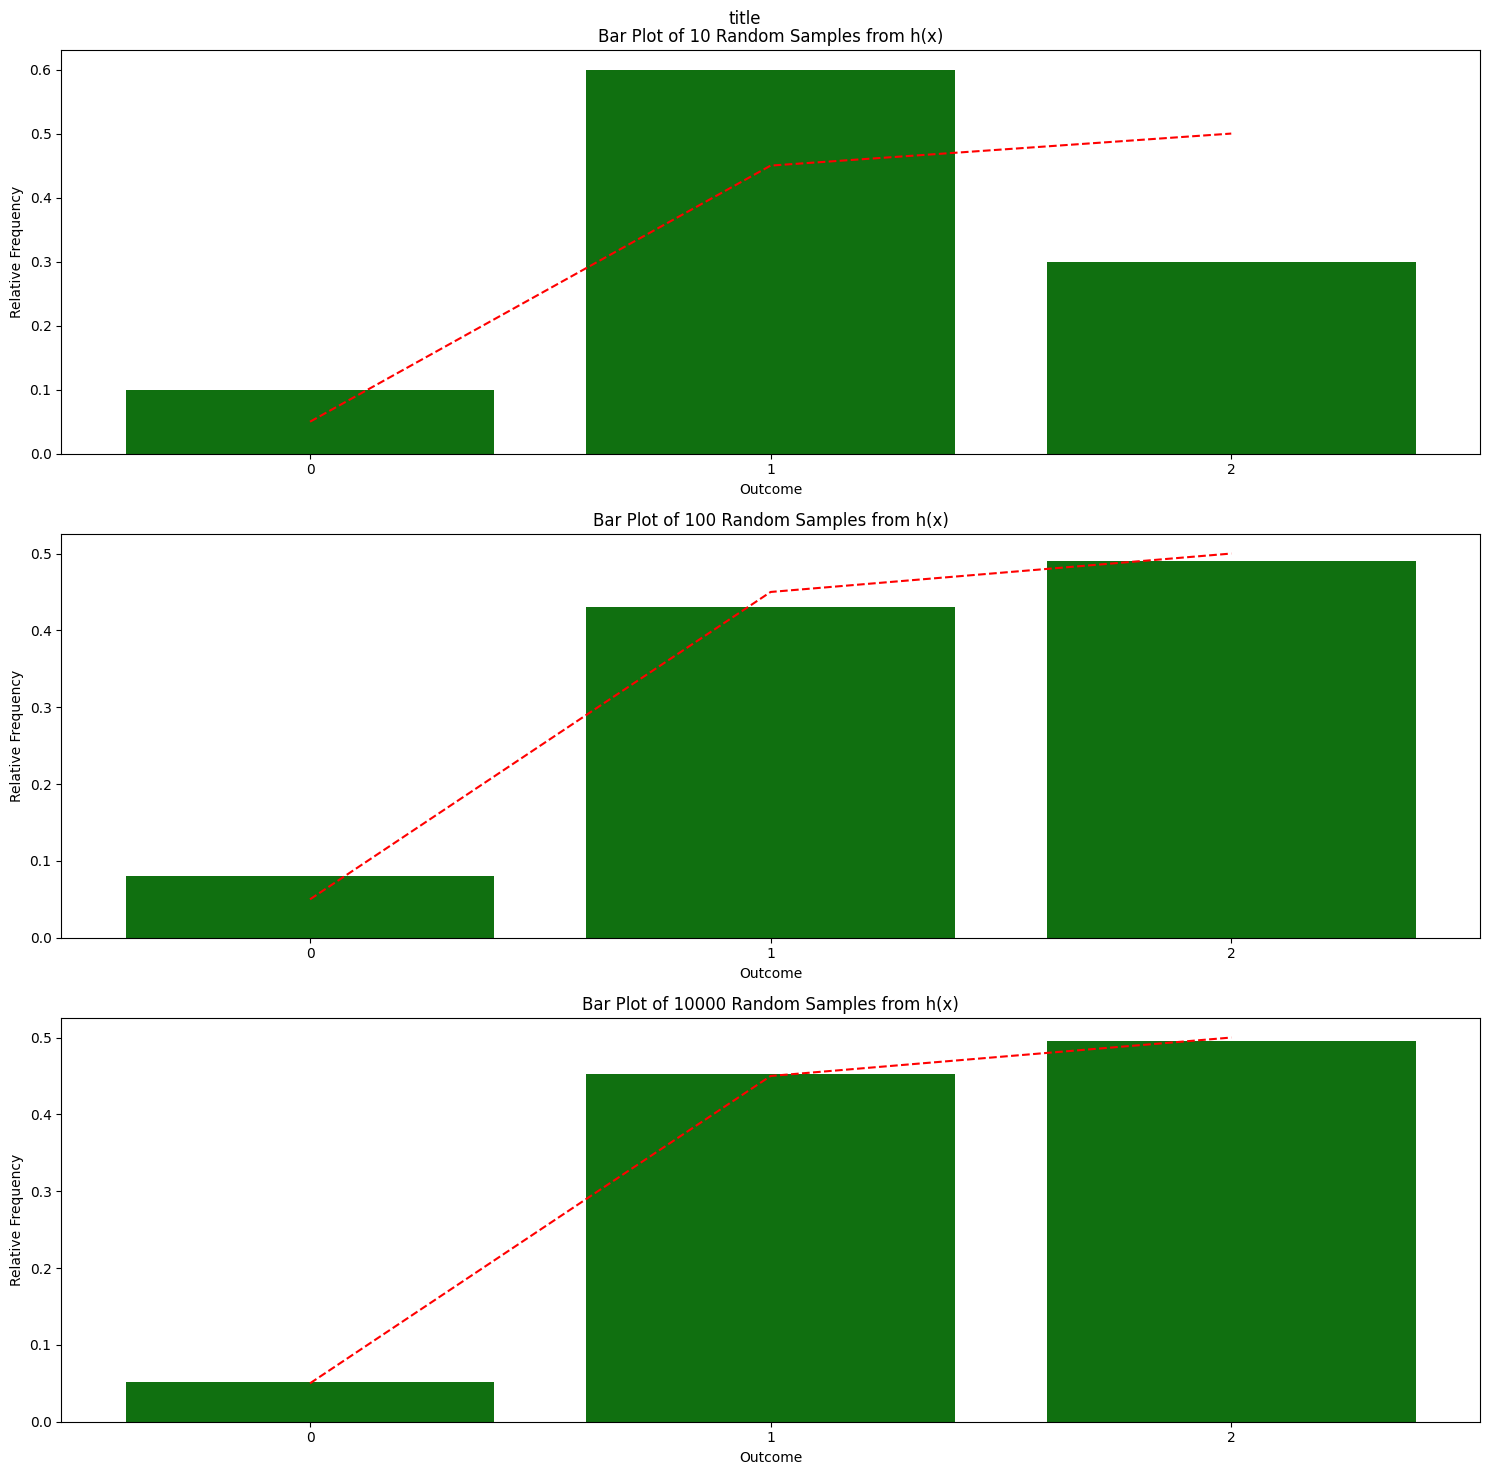

In [91]:
plt.figure(figsize=(15,15))
plt.suptitle('title')

sample_sizes = [10, 100, 10000]

for i, size in enumerate(sample_sizes):
    samples = np.random.choice([0, 1, 2], size=size, p=[h(0), h(1), h(2)])
    
    counts = np.unique(samples, return_counts=True)[1]
    frequencies = counts / size
    
    plt.subplot(len(sample_sizes), 1, i+1)
    sns.barplot(x=[0, 1, 2], y=frequencies, color='green')
    plt.plot([0, 1, 2], [h(0), h(1), h(2)], 'r--')
    plt.title(f'Bar Plot of {size} Random Samples from h(x)')
    plt.xlabel('Outcome')
    plt.ylabel('Relative Frequency')

plt.tight_layout()
plt.show()